<a href="https://colab.research.google.com/github/teooi/banana-brain-project/blob/main/leolabo_brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bids
!pip install nibabel
!pip install openneuro-py
!pip install nilearn
!pip install keras

In [ ]:
import openneuro as on
!openneuro-py download --dataset=ds001246 --target-dir=data/bids --include=sub-01

Streaming output truncated to the last 5000 lines.


Re-downloading sub-01_ses-perceptionTraining01_task-perception_run-04_bold.nii.gz: file size mismatch.: 16.0MB [00:05, 4.93MB/s]



Re-downloading sub-01_ses-perceptionTraining01_task-perception_run-03_bold.nii.gz: file size mismatch.: 14.0MB [00:07, 4.72MB/s]

Re-downloading sub-01_ses-perceptionTest04_task-perception_run-09_bold.nii.gz: file size mismatch.: 35.3MB [00:22, 3.96MB/s]



Re-downloading sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii.gz: file size mismatch.: 16.3MB [00:09, 3.64MB/s]


Re-downloading sub-01_ses-perceptionTraining01_task-perception_run-03_bold.nii.gz: file size mismatch.: 14.5MB [00:07, 4.64MB/s]
Re-downloading sub-01_ses-perceptionTraining01_task-perception_run-02_bold.nii.gz: file size mismatch.: 30.6MB [00:20, 908kB/s]

Re-downloading sub-01_ses-perceptionTest04_task-perception_run-09_bold.nii.gz: file size mismatch.: 35.8MB [00:22, 4.11MB/s]



Re-downloading sub-01_ses-perceptionTrai

In [ ]:
from bids import BIDSLayout, BIDSValidator
import os
import numpy as np

data_dir = "/content/data/bids"

layout = BIDSLayout(data_dir, derivatives=True, validate=False)
layout

/usr/local/lib/python3.10/dist-packages/bids/layout/layout.py:516: UserWarning: Derivative indexing was requested, but no valid datasets were found in the specified locations ([PosixUPath('/content/data/bids/derivatives')]). Note that all BIDS-Derivatives datasets must meet all the requirements for BIDS-Raw datasets (a common problem is to fail to include a 'dataset_description.json' file in derivatives datasets).
Example contents of 'dataset_description.json':
{"Name": "Example dataset", "BIDSVersion": "1.0.2", "GeneratedBy": [{"Name": "Example pipeline"}]}
  warnings.warn("Derivative indexing was requested, but no valid "


BIDS Layout: .../content/data/bids | Subjects: 1 | Sessions: 11 | Runs: 10

In [ ]:
layout.to_df()

entity,path,datatype,extension,run,session,subject,suffix,task
0,/content/data/bids/dataset_description.json,NaN,.json,NaN,NaN,NaN,description,NaN
1,/content/data/bids/sub-01/ses-anatomy/anat/sub...,anat,.nii.gz,NaN,anatomy,01,T1w,NaN
2,/content/data/bids/sub-01/ses-imageryTest01/an...,anat,.nii.gz,NaN,imageryTest01,01,inplaneT2,NaN
3,/content/data/bids/sub-01/ses-imageryTest01/fu...,func,.nii.gz,01,imageryTest01,01,bold,imagery
4,/content/data/bids/sub-01/ses-imageryTest01/fu...,func,.tsv,01,imageryTest01,01,events,imagery
...,...,...,...,...,...,...,...,...
167,/content/data/bids/sub-01/ses-perceptionTraini...,func,.tsv,03,perceptionTraining03,01,events,perception
168,/content/data/bids/sub-01/ses-perceptionTraini...,func,.nii.gz,04,perceptionTraining03,01,bold,perception
169,/content/data/bids/sub-01/ses-perceptionTraini...,func,.tsv,04,perceptionTraining03,01,events,perception
170,/content/data/bids/CHANGES,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import nibabel as nib
import os.path

t1_files = layout.get(subject='01', datatype='anat',session='anatomy', return_type='file', extension='.nii.gz')
t1_img = nib.load(t1_files[0])

bold_img_files = layout.get(subject='01', datatype='func', session='imageryTest01', return_type='file', extension='.nii.gz')
bold_img = nib.load(bold_img_files[0])

bold_img_labels = layout.get(subject='01', datatype='func', session='imageryTest01', return_type='file', extension='.tsv', run='01')

In [ ]:
from nilearn.plotting import view_img, plot_glass_brain, plot_anat, plot_epi, plot_img

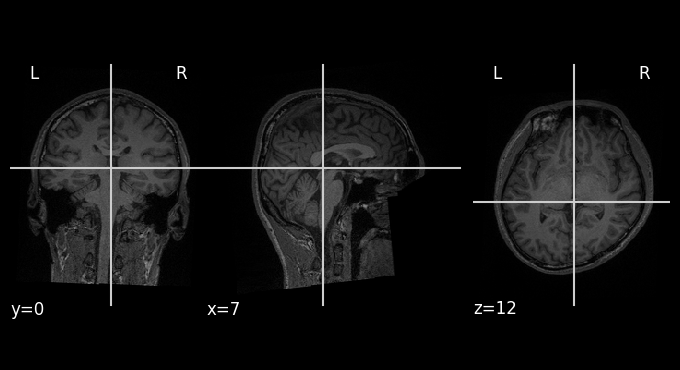

In [ ]:
plot_anat(t1_img)

In [ ]:
bold_img.shape

(64, 64, 50, 213)

In [ ]:
t1_img.shape

(256, 256, 192)

(64, 64, 50)


/usr/local/lib/python3.10/dist-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


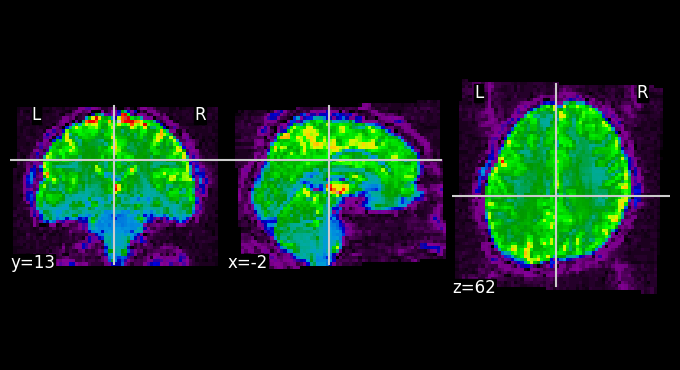

In [ ]:
func_vol = bold_img.slicer[:,:,:,0]
print(func_vol.shape)
plot_epi(func_vol)

In [ ]:
index = 1
for i in range(0,200,50): #change this, yes
  plot_epi(bold_img.slicer[:,:,:,i],output_file = "bold_" + str(index) + ".png")
  index += 1

/usr/local/lib/python3.10/dist-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(
/usr/local/lib/python3.10/dist-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(
/usr/local/lib/python3.10/dist-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(
/usr/local/lib/python3.10/dist-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


In [ ]:
!mkdir /content/images
!mv bold_*.png /content/images

mkdir: cannot create directory ‘/content/images’: File exists


In [ ]:
image_folder='/content/images'
image_files = [os.path.join(image_folder,img)
               for img in os.listdir(image_folder)
               if img.endswith(".png")]

#Sort image files
image_files.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))

In [ ]:
#Check if files are sorted image files
image_files[:5]

['/content/images/bold_1.png',
 '/content/images/bold_2.png',
 '/content/images/bold_3.png',
 '/content/images/bold_4.png']

In [ ]:
import os
import moviepy.video.io.ImageSequenceClip
import moviepy.editor

anim_name = 'brain_anim.mp4'
fps=4

clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile(anim_name)

moviepy.editor.ipython_display(anim_name)

Moviepy - Building video brain_anim.mp4.
Moviepy - Writing video brain_anim.mp4



Moviepy - Done !
Moviepy - video ready brain_anim.mp4


**We apply the brain masks provided**


In [ ]:
from nilearn import datasets
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-1mm')
atlas.filename

'/root/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-1mm.nii.gz'

In [ ]:
#Checking for labels
atlas.labels[:5]

['Background',
 'Frontal Pole',
 'Insular Cortex',
 'Superior Frontal Gyrus',
 'Middle Frontal Gyrus']

In [ ]:
from nilearn.maskers import NiftiLabelsMasker

#The mask itself without an image input

masker = NiftiLabelsMasker(
    atlas.maps,
    labels=atlas.labels,
    standardize="zscore_sample",
)


masker.fit() #no image provided

report = masker.generate_report()
report

  report = masker.generate_report()



In [ ]:
masker.fit(bold_img)
report = masker.generate_report()
report
#looks liek bold signals isn't fitting into mask

  return resample_img(



In [ ]:
signals = masker.transform(bold_img)
signals.shape

  warnings.warn(

Note that this may be due to some regions being dropped from the label image after resampling.
  return self.transform_single_imgs(



(213, 47)

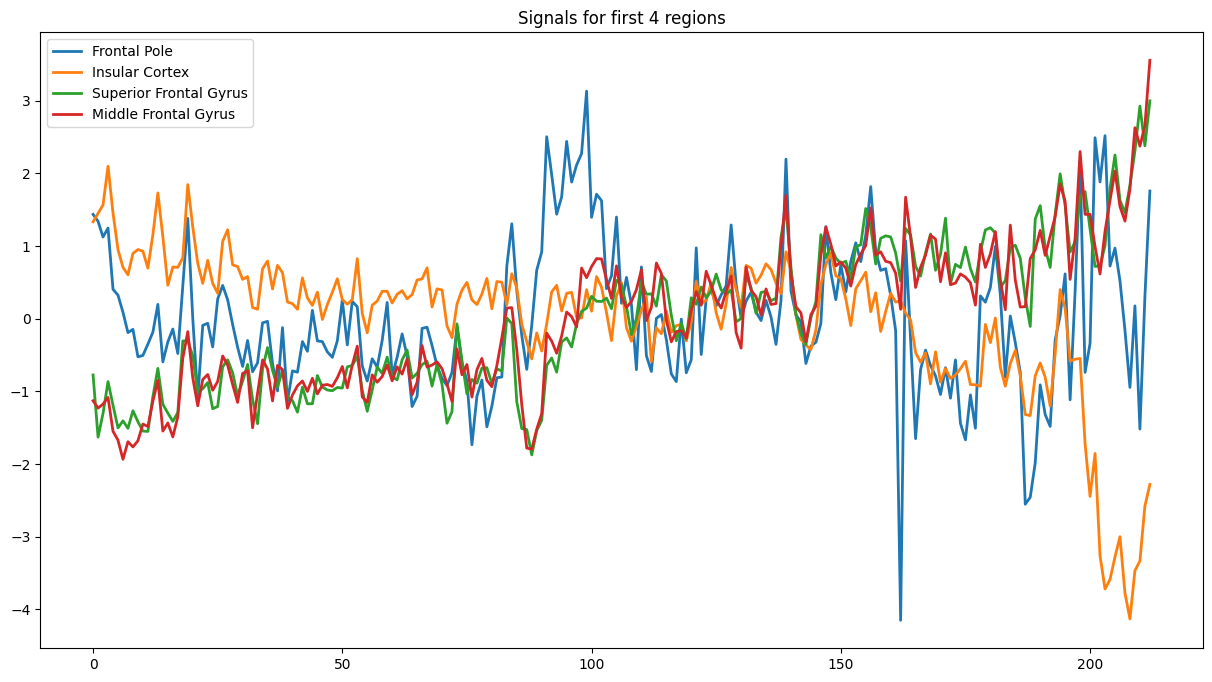

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
for label_idx in range(4):
    ax.plot(
        signals[:, label_idx],
        linewidth=2,
        label=atlas.labels[label_idx + 1]
    )  # 0 is background
ax.legend(loc=2)
ax.set_title("Signals for first 4 regions")
plt.show()

In [ ]:
#Areas in occipital cortex
occipital_pole_index = atlas.labels.index("Occipital Pole")-2
lateral_occipital_superior_index = atlas.labels.index("Lateral Occipital Cortex, superior division")-2
lateral_occipital_inferior_index = atlas.labels.index("Lateral Occipital Cortex, inferior division")-2
lingual_gyrus_index = atlas.labels.index("Lingual Gyrus")-2
cuneal_cortex_index = atlas.labels.index('Cuneal Cortex')-2

In [ ]:
occipital_pole_signals = signals[:, occipital_pole_index]
# occipital_pole_signals[:5]
atlas.labels[40:]

['Occipital Fusiform Gyrus',
 'Frontal Opercular Cortex',
 'Central Opercular Cortex',
 'Parietal Opercular Cortex',
 'Planum Polare',
 "Heschl's Gyrus (includes H1 and H2)",
 'Planum Temporale',
 'Supracalcarine Cortex',
 'Occipital Pole']

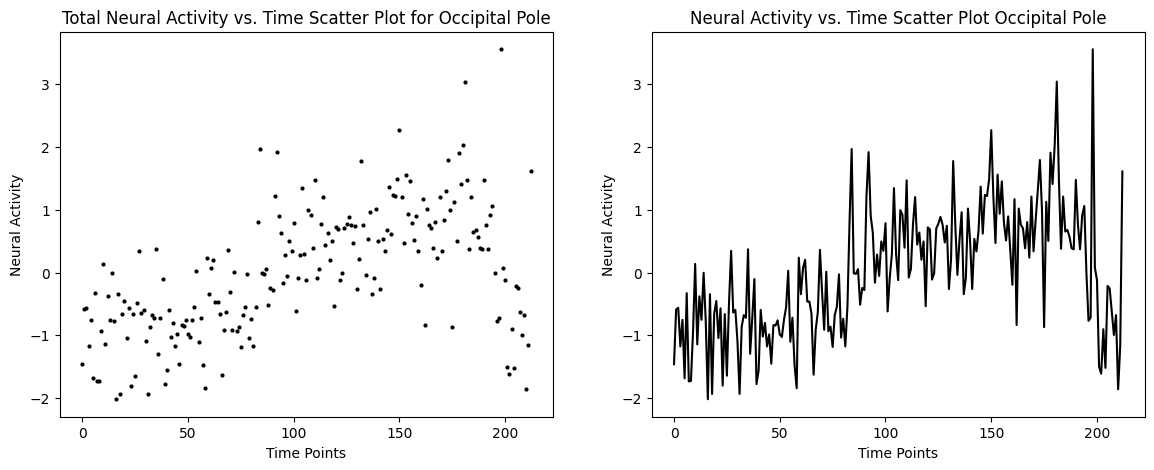

In [ ]:
time_points = list(range(len(occipital_pole_signals)))

plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
plt.scatter(time_points, occipital_pole_signals, color="black", alpha=1, s=4)

plt.xlabel("Time Points")
plt.ylabel("Neural Activity")
plt.title("Total Neural Activity vs. Time Scatter Plot for Occipital Pole")

plt.subplot(1,2,2)
plt.plot(time_points, occipital_pole_signals, color="black", alpha=1)

plt.xlabel("Time Points")
plt.ylabel("Neural Activity")
plt.title("Neural Activity vs. Time Scatter Plot Occipital Pole")

plt.show()

In [ ]:
# #cleaning up scatter data

# mean_signal = np.mean(occipital_pole_signals)
# std_noise = np.std(occipital_pole_signals)
# snr = mean_signal / std_noise

# print(f"Mean Signal: {mean_signal}")
# print(f"Standard Deviation of Noise: {std_noise}")
# print(f"Signal-to-Noise Ratio (SNR): {snr:.20f}")
# #not the play lmao

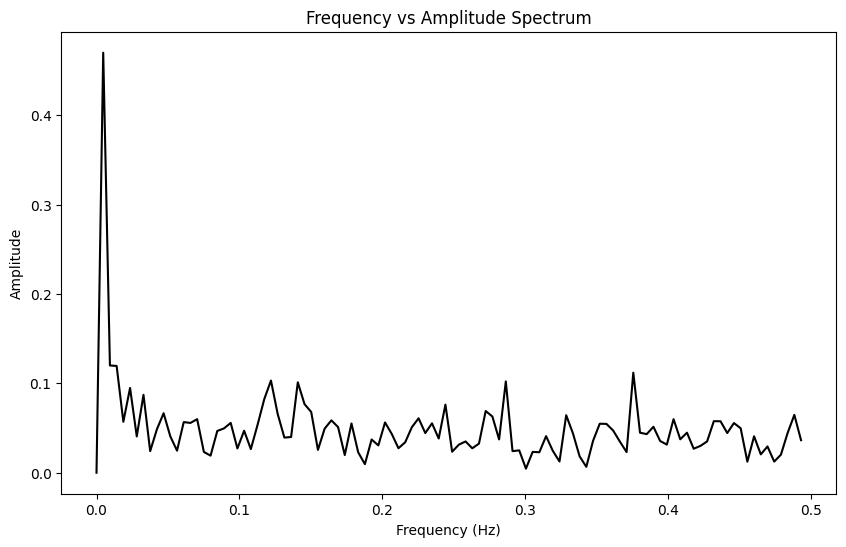

In [ ]:
N = len(occipital_pole_signals)
fft_values = np.fft.fft(occipital_pole_signals)

freqs = np.fft.fftfreq(N)
amplitudes = np.abs(fft_values) / N

positive_freqs = freqs[:N//2]
positive_amplitudes = amplitudes[:N//2]

plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, positive_amplitudes, color="black")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Frequency vs Amplitude Spectrum")
plt.show()

In [ ]:
bold_img_labels

['/content/data/bids/sub-01/ses-imageryTest01/func/sub-01_ses-imageryTest01_task-imagery_run-01_events.tsv']

In [ ]:
import pandas as pd
df = pd.read_csv(bold_img_labels[0], sep='\t')

In [ ]:
df

,onset,duration,trial_no,event_type,category_id,category_name,category_index,response_time,evaluation
0,0,33,1,rest,NaN,NaN,NaN,NaN,NaN
1,33,3,2,cue,2690373.0,n02690373,16.0,52.728104,5.0
2,36,15,2,imagery,2690373.0,n02690373,16.0,52.728104,5.0
3,51,3,2,evaluation,2690373.0,n02690373,16.0,52.728104,5.0
4,54,3,2,inter_rest,2690373.0,n02690373,16.0,52.728104,5.0
...,...,...,...,...,...,...,...,...,...
97,609,3,26,cue,1858441.0,n01858441,5.0,628.124058,5.0
98,612,15,26,imagery,1858441.0,n01858441,5.0,628.124058,5.0
99,627,3,26,evaluation,1858441.0,n01858441,5.0,628.124058,5.0
100,630,3,26,inter_rest,1858441.0,n01858441,5.0,628.124058,5.0


WORD NET THINGY

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import wordnet as wn
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
label_id_str = df["category_name"][1]
label_id_str

'n02690373'

In [ ]:
label_id = int(label_id_str[1:])
label_id

2690373

In [ ]:
wn.synset_from_pos_and_offset('n', label_id)

Synset('airliner.n.01')

In [ ]:
labels = []

for i in range(df.shape[0]):
  label_id_str = df["category_name"][i]
  # if pd.isna(label_id_str):
  #     labels.append("NaN")
  #     continue
  if isinstance(label_id_str, str):
    label_id = int(label_id_str[1:])
    labels.append(wn.synset_from_pos_and_offset('n', label_id))

In [ ]:
labels.insert(0,"NaN")
labels.append("NaN")
len(labels)

102

In [ ]:
labels[:10]

['NaN',
 Synset('airliner.n.01'),
 Synset('airliner.n.01'),
 Synset('airliner.n.01'),
 Synset('airliner.n.01'),
 Synset('crab.n.01'),
 Synset('crab.n.01'),
 Synset('crab.n.01'),
 Synset('crab.n.01'),
 Synset('shredder.n.01')]

In [ ]:
df2 = df.assign(labels=labels)
df2

,onset,duration,trial_no,event_type,category_id,category_name,category_index,response_time,evaluation,labels
0,0,33,1,rest,NaN,NaN,NaN,NaN,NaN,NaN
1,33,3,2,cue,2690373.0,n02690373,16.0,52.728104,5.0,Synset('airliner.n.01')
2,36,15,2,imagery,2690373.0,n02690373,16.0,52.728104,5.0,Synset('airliner.n.01')
3,51,3,2,evaluation,2690373.0,n02690373,16.0,52.728104,5.0,Synset('airliner.n.01')
4,54,3,2,inter_rest,2690373.0,n02690373,16.0,52.728104,5.0,Synset('airliner.n.01')
...,...,...,...,...,...,...,...,...,...,...
97,609,3,26,cue,1858441.0,n01858441,5.0,628.124058,5.0,Synset('swan.n.01')
98,612,15,26,imagery,1858441.0,n01858441,5.0,628.124058,5.0,Synset('swan.n.01')
99,627,3,26,evaluation,1858441.0,n01858441,5.0,628.124058,5.0,Synset('swan.n.01')
100,630,3,26,inter_rest,1858441.0,n01858441,5.0,628.124058,5.0,Synset('swan.n.01')


In [ ]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, GPT2Tokenizer
from PIL import Image
import requests
import torch

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = GPT2Tokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(

  warnings.warn(



In [ ]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values

encoder_outputs = model.encoder(pixel_values=pixel_values)

#Use the encoder's last hidden state as input to the decoder
embeddings = encoder_outputs.last_hidden_state

In [ ]:
#Getting text from image

generated_ids = model.generate(pixel_values)
generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

#Label generated from model
generated_text

The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
  warnings.warn(

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


'a cat laying on a blanket next to a cat laying on a bed '

In [ ]:
#Embeddings from from text to image model
embeddings

tensor([[[ 0.0168,  0.2107,  0.1995,  ..., -0.5195, -0.3214,  0.1780],
         [-0.2008,  0.1148,  0.2270,  ..., -0.1502, -0.0418,  0.6785],
         [-0.3049,  0.0895,  0.2627,  ..., -0.1320, -0.0527,  0.6166],
         ...,
         [-0.3295,  0.1130,  0.2756,  ..., -0.1097, -0.1763,  0.7769],
         [-0.1989,  0.1304,  0.3892,  ..., -0.1710, -0.1535,  0.7054],
         [-0.2620,  0.1323,  0.3183,  ..., -0.1763, -0.0457,  0.6056]]],
       grad_fn=<NativeLayerNormBackward0>)